<a href="https://colab.research.google.com/github/Bashupalkharwar/Stock-Price-Prediction/blob/main/STOCK_PRICE_PREDICTION_USING_LONG_SORT_TERM_MEMORY_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STOCK PRICE PREDICTION USING LONG SORT TERM MEMORY (LSTM)##

##1.Importing The Libraries##

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

##2. Read The Dataset:##

In [ ]:
dataset = pd.read_csv('NSE-TATAGLOBAL.csv',index_col="Date",parse_dates=True)

In [ ]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset.tail()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Close: 30 Day Mean
Date,,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98,116.105000
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01,115.920000
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31,115.870000
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17,115.820000
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56,115.771667


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [ ]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
dataset.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

##3. Analyze The Closing Prices From Dataframe:##

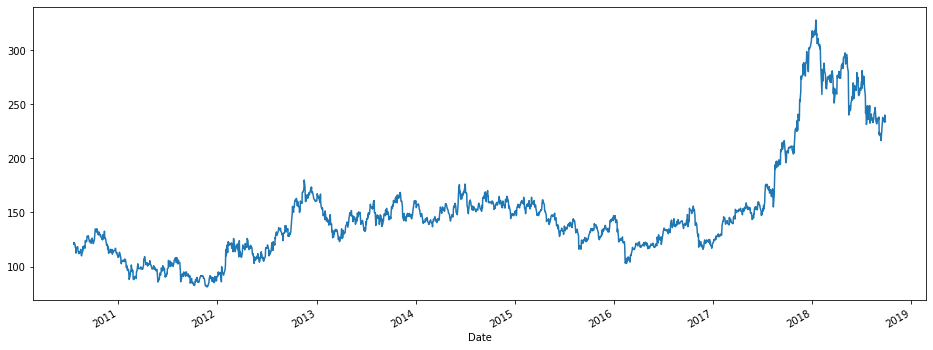

In [ ]:
dataset['Open'].plot(figsize=(16,6))

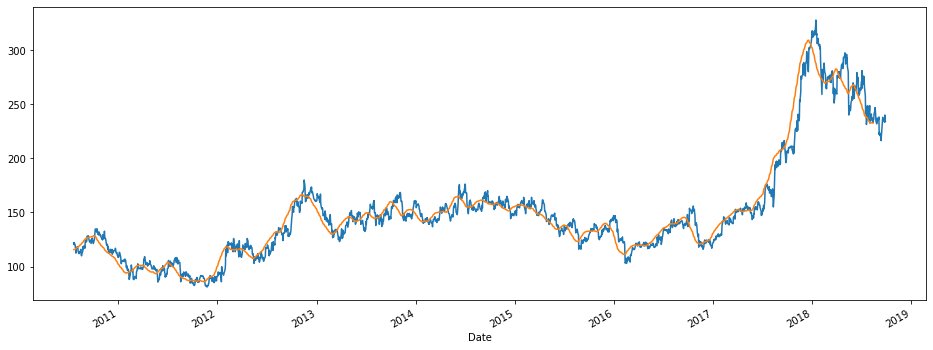

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

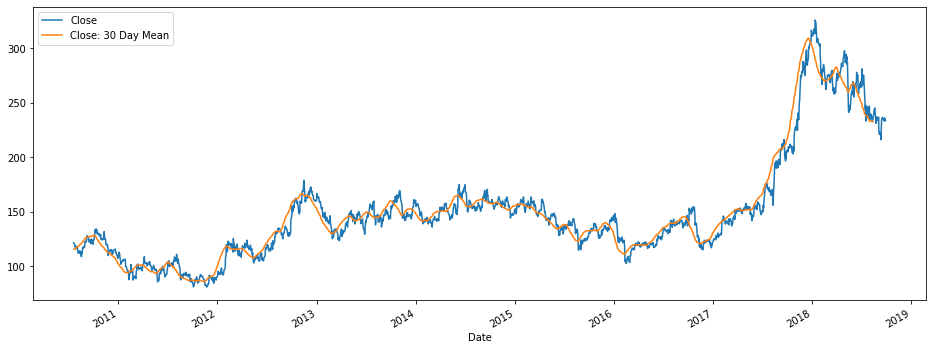

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

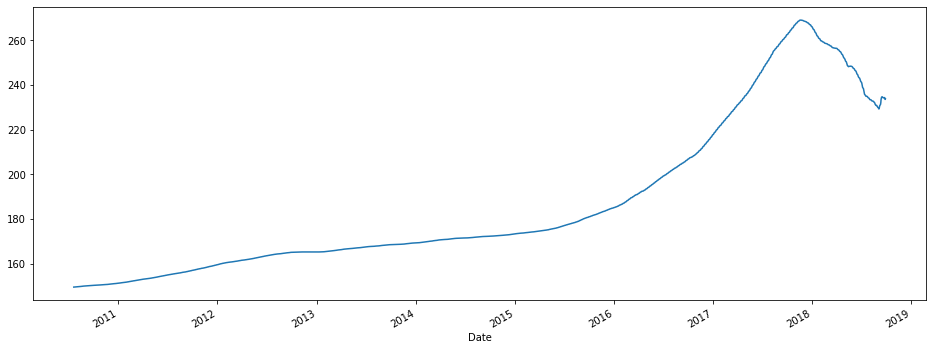

In [ ]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

##3. Normalize The New Filtered Dataset:##

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##4. Build And Train The LSTM Model:##

In [ ]:
# Initialising the RNN
regressor = Sequential()


In [ ]:

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
38/38 [==============================] - 13s 116ms/step - loss: 0.0307
Epoch 2/20
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 3/20
38/38 [==============================] - 4s 116ms/step - loss: 0.0038
Epoch 4/20
38/38 [==============================] - 4s 116ms/step - loss: 0.0038
Epoch 5/20
38/38 [==============================] - 5s 119ms/step - loss: 0.0030
Epoch 6/20
38/38 [==============================] - 4s 116ms/step - loss: 0.0026
Epoch 7/20
38/38 [==============================] - 5s 119ms/step - loss: 0.0025
Epoch 8/20
38/38 [==============================] - 5s 119ms/step - loss: 0.0028
Epoch 9/20
38/38 [==============================] - 4s 114ms/step - loss: 0.0030
Epoch 10/20
38/38 [==============================] - 5s 118ms/step - loss: 0.0026
Epoch 11/20
38/38 [==============================] - 5s 119ms/step - loss: 0.0034
Epoch 12/20
38/38 [==============================] - 4s 117ms/step - loss: 0.0026
Epoch 13/20
38/38 [=====

##5.The Predicted Stock Costs With Actual Stock Costs:##

In [ ]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:

dataset_test.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2018-10-24 to 2018-10-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  16 non-null     float64
 1   High                  16 non-null     float64
 2   Low                   16 non-null     float64
 3   Last                  16 non-null     float64
 4   Close                 16 non-null     float64
 5   Total Trade Quantity  16 non-null     int64  
 6   Turnover (Lacs)       16 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.0 KB


In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2018-10-24 to 2018-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:

predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16 non-null     float32
dtypes: float32(1)
memory usage: 192.0 bytes


##6.Visualising The Results##

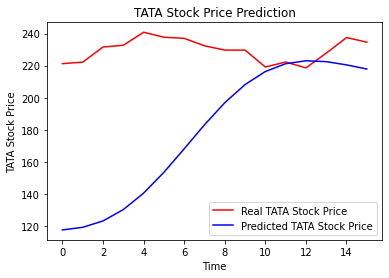

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()